<a href="https://colab.research.google.com/github/csch7/Computational-Physics/blob/main/Solving_Differential_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from scipy.io import loadmat
from google.colab import drive

drive.mount('/content/drive')

dat = loadmat('/content/drive/MyDrive/Colab Notebooks/burgers_data_R10.mat')

Mounted at /content/drive


In [25]:
from torch.utils.data import Dataset, DataLoader

class PDE_NN(nn.Module):
  def __init__(self, input_dim, hidden_dim, n_layers, output_dim):
    super().__init__()
    layers = []
    layers.append(nn.Linear(input_dim, hidden_dim))
    layers.append(nn.ReLU())
    layers.append(nn.BatchNorm1d(hidden_dim))
    for i in range(1, n_layers):
      layers.append(nn.Linear(hidden_dim, hidden_dim))
      layers.append(nn.ReLU())
      layers.append(nn.BatchNorm1d(hidden_dim))
    layers.append(nn.Linear(hidden_dim, output_dim))

    self.layers = nn.Sequential(*layers)

  def forward(self, x):
    return self.layers(x)


class pde_ds(Dataset):
  def __init__(self, a, u):
    self.inputs = np.array(a, dtype=np.float32)
    self.out = np.array(u, dtype=np.float32)

  def __len__(self):
    return len(self.inputs)

  def __getitem__(self, index):
    return self.inputs[index], self.out[index]


[[-0.08994208 -0.09275733 -0.09557583 ... -0.07872097 -0.08151953
  -0.08432281]
 [-0.300377   -0.29693168 -0.29349346 ... -0.3142229  -0.31075239
  -0.30728768]
 [-0.76289453 -0.76589239 -0.76882666 ... -0.75027407 -0.75352281
  -0.75670938]
 ...
 [-1.2685775  -1.26795497 -1.26732946 ... -1.27102434 -1.27042046
  -1.26981092]
 [-0.59933517 -0.60058784 -0.60183001 ... -0.59421292 -0.59551086
  -0.596797  ]
 [-0.89848939 -0.90675103 -0.91502396 ... -0.86557165 -0.87378018
  -0.88200318]]


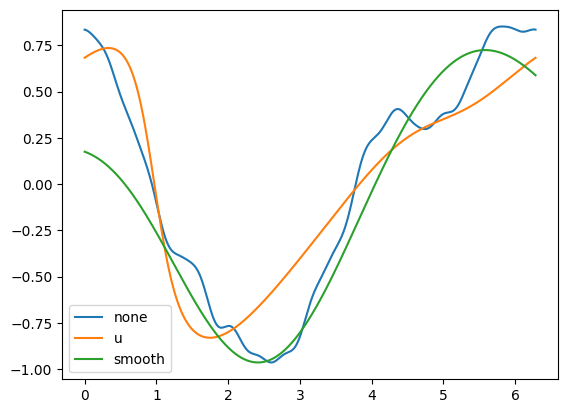

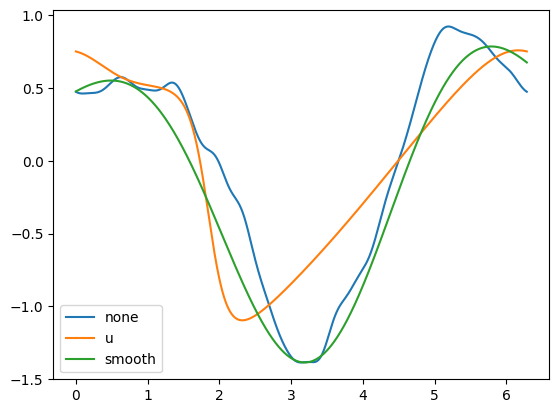

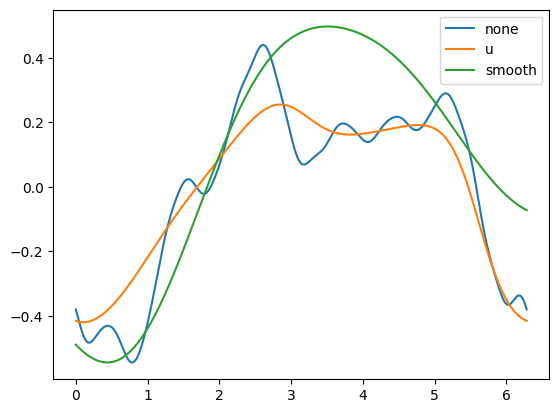

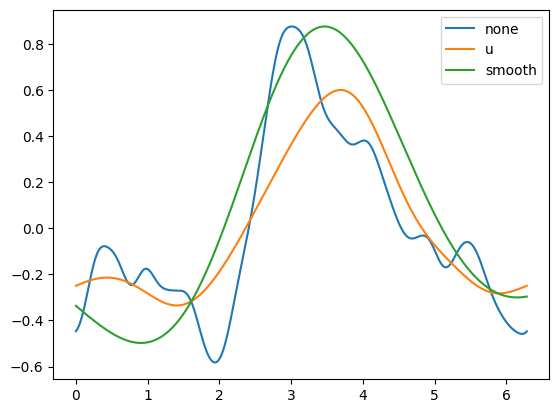

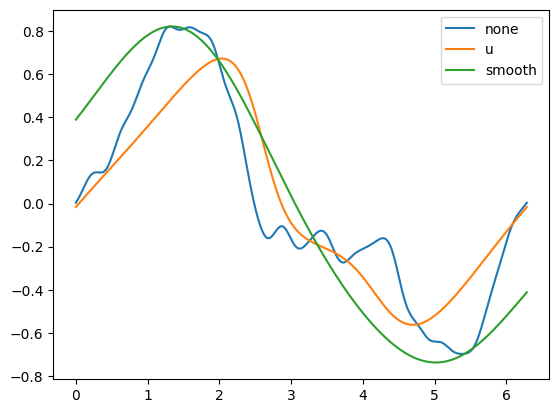

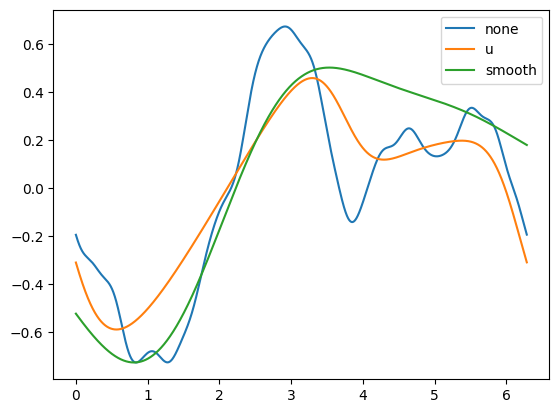

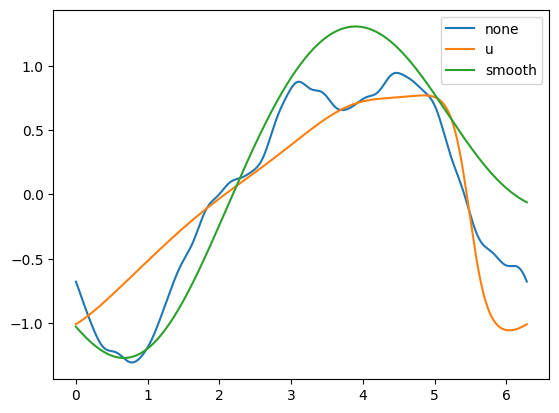

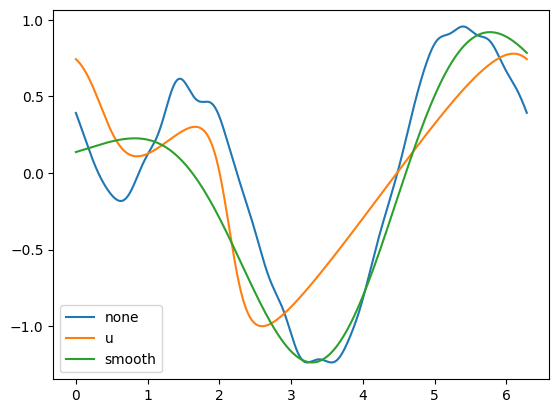

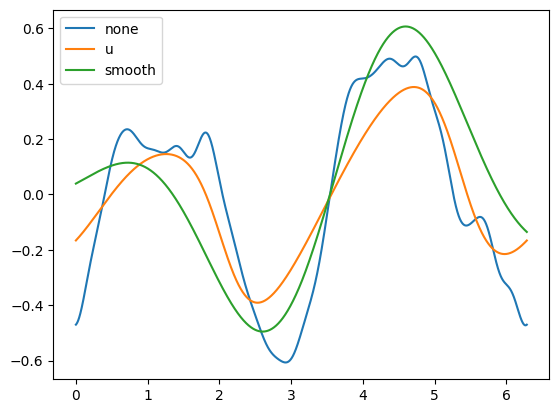

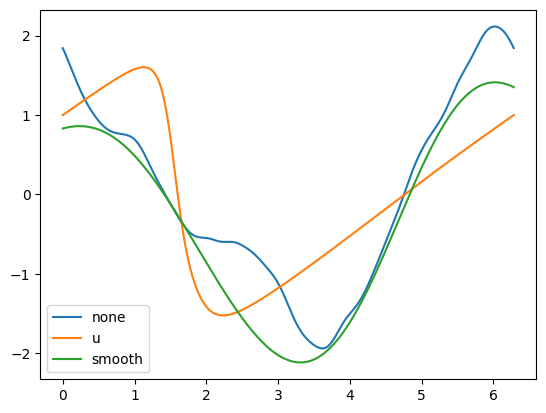

In [14]:
print(dat['a_x'])

for ai in range(10):
  plt.plot( np.linspace(0, 2*np.pi, len(dat['a'][ai])), dat['a'][ai],label='none')
  plt.plot( np.linspace(0, 2*np.pi, len(dat['u'][ai])), dat['u'][ai],label='u')
  plt.plot( np.linspace(0, 2*np.pi, len(dat['a'][ai])), dat['a_smooth'][ai],label='smooth')
  plt.legend()
  plt.show()

In [ ]:
import torch.optim as opt
import torch
from tqdm import tqdm

idxs = np.arange(len(dat['a']))
train_idxs = np.random.choice(idxs, int(0.7*len(idxs)))
test_idxs = [i for i in idxs if i not in train_idxs]

train_loader = DataLoader(pde_ds(dat['a'][train_idxs], dat['u'][train_idxs]), batch_size = 32)
test_loader = DataLoader(pde_ds(dat['a'][test_idxs], dat['u'][test_idxs]), batch_size = len(test_idxs))


model = PDE_NN(len(dat['a'][0]), 64, 4, len(dat['u'][0]))
optimizer = opt.AdamW(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()
epochs = 50

for e in range(epochs):
  losses = []
  for i, (a, u) in tqdm(enumerate(train_loader), total=len(train_loader)):
    optimizer.zero_grad()
    pred = model(a)
    loss = loss_fn(pred, u)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

  print(np.mean(losses))


model.eval()
with torch.no_grad():
  for _, (a, u) in enumerate(test_loader):
    pred = model(a)
    print(loss_fn(pred, u).item())

    plt.plot(np.arange(len(pred[0])), pred[0])
    plt.plot(np.arange(len(u[0])), u[0])
    plt.show()



100%|██████████| 45/45 [00:00<00:00, 49.86it/s]


0.5149428473578559


100%|██████████| 45/45 [00:00<00:00, 46.93it/s]


0.38254412611325583


100%|██████████| 45/45 [00:00<00:00, 45.05it/s]


0.26793090369966294


100%|██████████| 45/45 [00:00<00:00, 45.54it/s]


0.1935819923877716


100%|██████████| 45/45 [00:00<00:00, 47.73it/s]


0.15016478482219908


100%|██████████| 45/45 [00:00<00:00, 59.88it/s]


0.12381303475962745


100%|██████████| 45/45 [00:00<00:00, 58.72it/s]


0.10685142162773344


100%|██████████| 45/45 [00:00<00:00, 58.90it/s]


0.09523434821102354


100%|██████████| 45/45 [00:00<00:00, 61.46it/s]


0.0866997101240688


100%|██████████| 45/45 [00:00<00:00, 60.32it/s]


0.0800212108426624


100%|██████████| 45/45 [00:00<00:00, 59.89it/s]


0.07457663830783633


100%|██████████| 45/45 [00:00<00:00, 59.97it/s]


0.07000251387556394


100%|██████████| 45/45 [00:00<00:00, 59.12it/s]


0.06609793860051368


100%|██████████| 45/45 [00:00<00:00, 59.68it/s]


0.06271041813823912


100%|██████████| 45/45 [00:00<00:00, 59.34it/s]


0.05979177670346366


100%|██████████| 45/45 [00:00<00:00, 59.97it/s]


0.05725408775938882


100%|██████████| 45/45 [00:00<00:00, 60.49it/s]


0.05504329419798321


100%|██████████| 45/45 [00:00<00:00, 58.39it/s]


0.05312049140532812


100%|██████████| 45/45 [00:00<00:00, 45.44it/s]


0.05145155506001579


100%|██████████| 45/45 [00:01<00:00, 43.89it/s]


0.05000619673066669


100%|██████████| 45/45 [00:00<00:00, 45.21it/s]


0.04874234389927652


100%|██████████| 45/45 [00:01<00:00, 43.04it/s]


0.04764135082562764


100%|██████████| 45/45 [00:00<00:00, 59.12it/s]


0.046668473796712025


100%|██████████| 45/45 [00:00<00:00, 60.09it/s]


0.0458195838249392


100%|██████████| 45/45 [00:00<00:00, 59.19it/s]


0.04505712265769641


100%|██████████| 45/45 [00:00<00:00, 61.05it/s]


0.04436569946507613


100%|██████████| 45/45 [00:00<00:00, 59.29it/s]


0.04375977665185928


100%|██████████| 45/45 [00:00<00:00, 59.28it/s]


0.04319433801703983


100%|██████████| 45/45 [00:00<00:00, 59.04it/s]


0.042684858250949115


100%|██████████| 45/45 [00:00<00:00, 60.14it/s]


0.04222251499692599


100%|██████████| 45/45 [00:00<00:00, 59.39it/s]


0.0417756639007065


100%|██████████| 45/45 [00:00<00:00, 58.23it/s]


0.041336940518683855


100%|██████████| 45/45 [00:00<00:00, 59.56it/s]


0.04093414155973329


100%|██████████| 45/45 [00:00<00:00, 60.92it/s]


0.04055317661000623


 47%|████▋     | 21/45 [00:00<00:00, 58.53it/s]